# STORE SALES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/avina/Downloads/trainity excel/Superstore.xlsx")

In [3]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.duplicated().sum()



np.int64(0)

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


## Exploratory Data Analysis
### Customer Analysis

In [7]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [9]:
# number of customers in each segments

number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'Customer Type', 'count':'Total Customers'})
print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5191
1     Corporate             3020
2   Home Office             1783


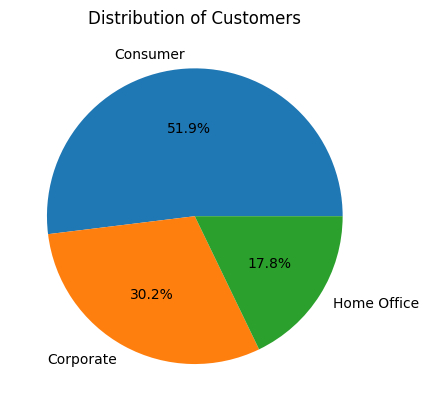

In [10]:
plt.pie(number_of_customers['Total Customers'],labels= number_of_customers['Customer Type'],autopct='%1.1f%%')
plt.title('Distribution of Customers')
plt.show()

---

## Sales per Customer Type

In [11]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={'Segment':'Customer Type','Sales':'Total Sales'})
print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.161401e+06
1     Corporate  7.061464e+05
2   Home Office  4.296531e+05


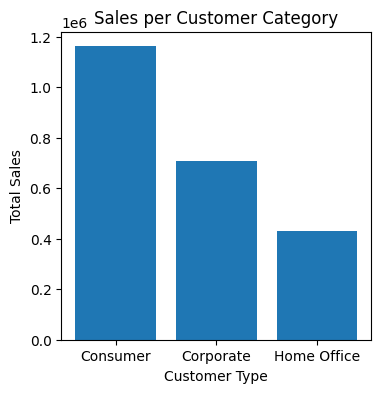

In [12]:
plt.figure(figsize= (4,4))
plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

---

## Top 10 Repeated Customers.

In [13]:
#Group data according to: Customer Name, Segment and Calculate freq. of their orders
customer_order_freq = df.groupby(['Customer ID', 'Customer Name','Segment'])['Order ID'].count().reset_index()
#Rename the order Id column
customer_order_freq.rename(columns={'Order ID':'Total Orders'}, inplace = True)

#Identify repeat customers
repeat_customers = customer_order_freq[customer_order_freq['Total Orders']>= 1]

#sort repeat customer in descending order
sorted_repeated_customers = repeat_customers.sort_values(by= 'Total Orders', ascending = False)

print (sorted_repeated_customers.head(10).reset_index(drop=True))



  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    MA-17560         Matt Abelman  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    PP-18955           Paul Prost  Home Office            34
4    EH-13765         Edward Hooks    Corporate            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    SV-20365          Seth Vernon     Consumer            32
7    CK-12205  Chloris Kastensmidt     Consumer            32
8    AP-10915       Arthur Prichep     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


---

## Ranking Customers according to Sales

In [20]:
#Group data based on: Customer Name, Customer ID and Sales
customer_sales= df.groupby(['Customer ID', 'Customer Name','Segment'])['Sales'].sum().reset_index()


#sort repeat customer in descending order
top_Spenders = customer_sales.sort_values(by= 'Sales', ascending = False)

print (top_Spenders.head(10).reset_index(drop=True))



  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


---

## Analysing Shipping Methods

In [14]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
type_of_shipping= df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [16]:
# Shipping methods Frequency
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={'Ship Mode':'Mode of Shipment', 'count':'Used'})
print(shipping_mode)

  Mode of Shipment  Used
0   Standard Class  5968
1     Second Class  1945
2      First Class  1538
3         Same Day   543


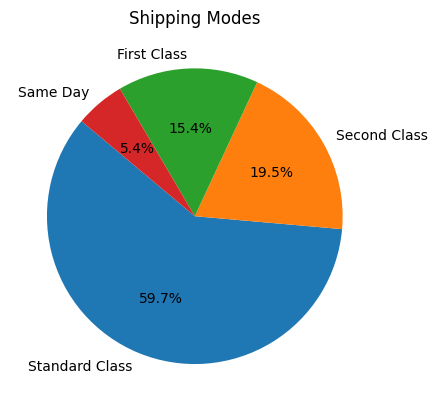

In [17]:
plt.pie(shipping_mode['Used'], labels=shipping_mode['Mode of Shipment'], autopct = '%1.1f%%',startangle =140 )
plt.title('Shipping Modes')
plt.show()

### Maximum there are Standard Class Shipping method


---

In [18]:
### Customer by States
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'count':'Number of Customers'})
print(state.head(6))

          State  Number of Customers
0    California                 2001
1      New York                 1128
2         Texas                  985
3  Pennsylvania                  587
4    Washington                  506
5      Illinois                  492


In [19]:
# Customers by city
city = df['City'].value_counts().reset_index()
city = city.rename(columns={'count':'Number of Customers'})
print(city.head(6))

            City  Number of Customers
0  New York City                  915
1    Los Angeles                  747
2   Philadelphia                  537
3  San Francisco                  510
4        Seattle                  428
5        Houston                  377


---

### Total Sales per State

In [20]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_state_sales = state_sales.sort_values(by='Sales', ascending=False)
print(top_state_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


---

## Product Analysis

In [21]:
# Types of product categories
products_category = df['Category'].unique()
print(products_category)

['Furniture' 'Office Supplies' 'Technology']


In [22]:
# Sub-category present in Category
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category',ascending=False)
print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


---

In [23]:
### Sales per each category
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='Sales', ascending=False)
print(category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


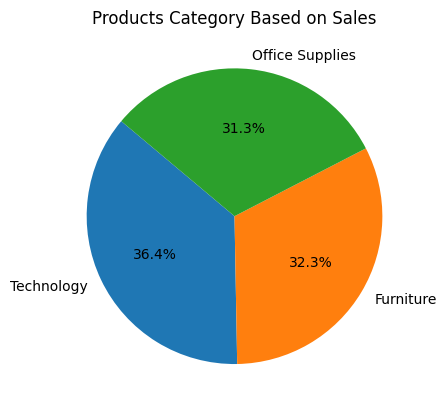

In [24]:
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct = '%1.1f%%',startangle =140 )
plt.title('Products Category Based on Sales')
plt.show()

---

### Sub-category Vs Sales

In [25]:
pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
top_pdt_subcategory= pdt_subcategory.sort_values(by='Sales', ascending=False)
print(top_pdt_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  330007.0540
1        Chairs  328449.1030
2       Storage  223843.6080
3        Tables  206965.5320
4       Binders  203412.7330
5      Machines  189238.6310
6   Accessories  167380.3180
7       Copiers  149528.0300
8     Bookcases  114879.9963
9    Appliances  107532.1610
10  Furnishings   91705.1640
11        Paper   78479.2060
12     Supplies   46673.5380
13          Art   27118.7920
14    Envelopes   16476.4020
15       Labels   12486.3120
16    Fasteners    3024.2800


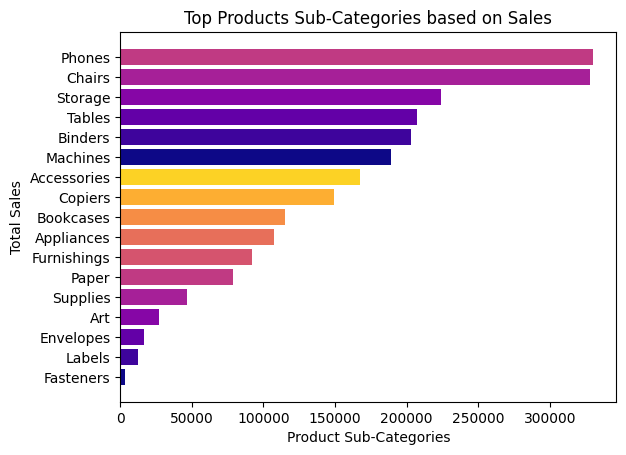

In [26]:
cmap = plt.get_cmap('plasma')
colors = [cmap(i/ len('Total Sales'))
          for i in range(len('Total Sales'))]
top_pdt_subcategory= pdt_subcategory.sort_values(by='Sales', ascending=True)
plt.barh(top_pdt_subcategory['Sub-Category'], top_pdt_subcategory['Sales'],color = colors)
plt.title('Top Products Sub-Categories based on Sales')
plt.xlabel('Product Sub-Categories')
plt.ylabel('Total Sales')
plt.show()

---

## Sales Trend Analysis

In [43]:
# Sales per Year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales= yearly_sales.reset_index()
yearly_sales= yearly_sales.rename(columns={'Order Date':'Year', 'Sales':'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


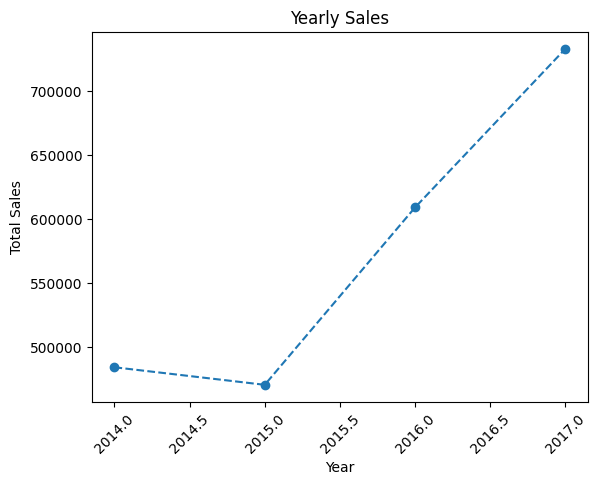

In [28]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker= 'o', linestyle='--')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Quarterly Sales

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Calculate quarterly sales for all years
quarterly_sales_all_years = df.resample('Q', on='Order Date')['Sales'].sum().reset_index()

# Rename columns for clarity
quarterly_sales_all_years = quarterly_sales_all_years.rename(columns={'Order Date':'Quarter', 'Sales':'Total_Sales'})

# Print quarterly sales for each year
for year in quarterly_sales_all_years['Quarter'].dt.year.unique():
    year_sales = quarterly_sales_all_years[quarterly_sales_all_years['Quarter'].dt.year == year]
    print(f"These are the Quarterly Sales for {year}:")
    print(year_sales)

These are the Quarterly Sales for 2014:
     Quarter  Total_Sales
0 2014-03-31   74447.7960
1 2014-06-30   86538.7596
2 2014-09-30  143633.2123
3 2014-12-31  179627.7302
These are the Quarterly Sales for 2015:
     Quarter  Total_Sales
4 2015-03-31   68851.7386
5 2015-06-30   89124.1870
6 2015-09-30  130259.5752
7 2015-12-31  182297.0082
These are the Quarterly Sales for 2016:
      Quarter  Total_Sales
8  2016-03-31   93237.1810
9  2016-06-30  136082.3010
10 2016-09-30  143787.3622
11 2016-12-31  236098.7538
These are the Quarterly Sales for 2017:
      Quarter  Total_Sales
12 2017-03-31  123144.8602
13 2017-06-30  133764.3720
14 2017-09-30  196251.9560
15 2017-12-31  280054.0670


C:\Users\avina\AppData\Local\Temp\ipykernel_36496\1603540342.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales_all_years = df.resample('Q', on='Order Date')['Sales'].sum().reset_index()


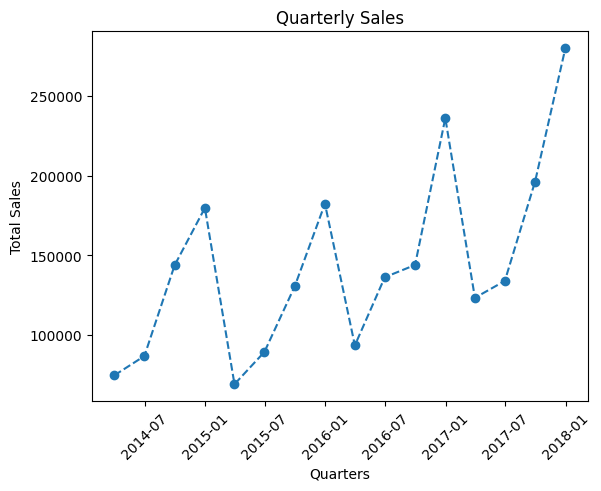

In [34]:
plt.plot(quarterly_sales_all_years['Quarter'] , quarterly_sales_all_years['Total_Sales'], marker= 'o', linestyle='--')
plt.title('Quarterly Sales')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

---

## Profit Analysis

In [47]:
# Yearle Profit
yearly_profit = df.groupby(df['Order Date'].dt.year)['Profit'].sum()
yearly_profit= yearly_profit.reset_index()

yearly_profit= yearly_profit.rename(columns={'Order Date':'Year', 'Profit':'Total Profit'})
print(yearly_profit)

   Year  Total Profit
0  2014    49543.9741
1  2015    61618.6037
2  2016    81795.1743
3  2017    93439.2696


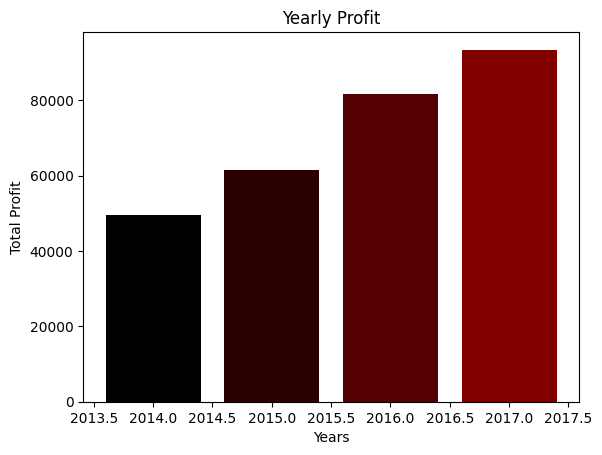

In [53]:
cmap = plt.get_cmap('afmhot')
colors = [cmap(i/ len('Total Profit'))
          for i in range(len('Total Profit'))]

plt.bar(yearly_profit['Year'], yearly_profit['Total Profit'],color = colors)
plt.title('Yearly Profit')
plt.xlabel('Years')
plt.ylabel('Total Profit')
plt.show()

---

In [55]:
# Category based Profit
category_profit = df.groupby(['Category'])['Profit'].sum()
category_profit= category_profit.reset_index()
category_profit= category_profit.rename(columns={'Profit':'Total Profit'})

print(category_profit)

          Category  Total Profit
0        Furniture    18451.2728
1  Office Supplies   122490.8008
2       Technology   145454.9481


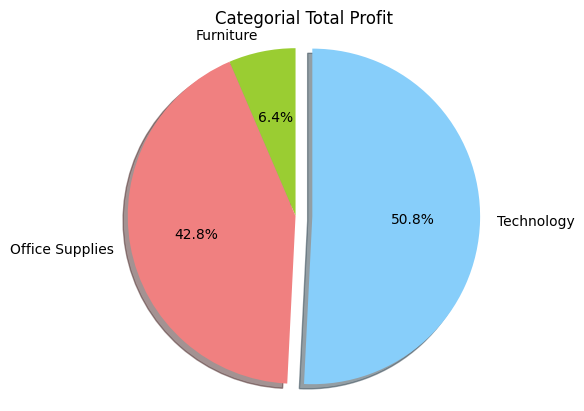

In [62]:
colors= ['yellowgreen', 'lightcoral', 'lightskyblue']
explode= (0,0,0.1)
ax= plt.subplot()
ax.pie(category_profit['Total Profit'], labels=category_profit['Category'],colors = colors, explode=explode,
       shadow=True, autopct = '%1.1f%%',startangle =90 )
ax.axis('equal')
plt.title("Categorial Total Profit")
plt.show()

### Technology has highest Profit.